In [10]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 
#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/Design_MMI_LucasLobo/klayout')) #Current directory

In [11]:
f=mode.gdsopen('MMIGDS.gds')
mode.gdsbegincell(f,'MMI')
#MMI
mode.gdsaddrect(f,1,90.5e-6,0,181e-6,10e-6) 
#GUIA ENTRADA
mode.gdsaddrect(f,1,-7e-6,4.24e-6,2e-6,0.45e-6)
mode.gdsaddrect(f,1,-7e-6,-4.24e-6,2e-6,0.45e-6)
#GUIA SAIDA EXTERNA
mode.gdsaddrect(f,1,188e-6,4.24e-6,2e-6,0.45e-6)
mode.gdsaddrect(f,1,188e-6,-4.24e-6,2e-6,0.45e-6)
#GUIA SAIDA INTERNA
mode.gdsaddrect(f,1,188e-6,0.76e-6,2e-6,0.45e-6)
mode.gdsaddrect(f,1,188e-6,-0.76e-6,2e-6,0.45e-6)
#TAPPER ENTRADA
mode.gdsaddpoly(f,1,np.array([[0,(0.75+4.24)*1e-6],[0,(-0.75+4.24)*1e-6],[-6e-6,(-0.225+4.24)*1e-6],[-6e-6,(0.225+4.24)*1e-6]]))
mode.gdsaddpoly(f,1,np.array([[0,(0.75-4.24)*1e-6],[0,(-0.75-4.24)*1e-6],[-6e-6,(-0.225-4.24)*1e-6],[-6e-6,(0.225-4.24)*1e-6]]))
#TAPPER SAIDA EXTERNA
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75+4.24)*1e-6],[181e-6,(-0.75+4.24)*1e-6],[187e-6,(-0.225+4.24)*1e-6],[187e-6,(0.225+4.24)*1e-6]]))
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75-4.24)*1e-6],[181e-6,(-0.75-4.24)*1e-6],[187e-6,(-0.225-4.24)*1e-6],[187e-6,(0.225-4.24)*1e-6]]))
#TAPPER SAIDA INTERNA
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75+0.76)*1e-6],[181e-6,(-0.75+0.76)*1e-6],[187e-6,(-0.225+0.76)*1e-6],[187e-6,(0.225+0.76)*1e-6]]))
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75-0.76)*1e-6],[181e-6,(-0.75-0.76)*1e-6],[187e-6,(-0.225-0.76)*1e-6],[187e-6,(0.225-0.76)*1e-6]]))

mode.gdsendcell(f)
mode.gdsclose(f)

NameError: name 'mode' is not defined

In [ ]:
inter = lumapi.INTERCONNECT(filename='chip.icp')


In [ ]:
resultados1 = inter.getresult('ONA_1','input 1/mode 1/gain')
resultados2 = inter.getresult('ONA_1','input 2/mode 1/gain')
resultados3 = inter.getresult('ONA_1','input 3/mode 1/gain')
resultados4 = inter.getresult('ONA_1','input 4/mode 1/gain')

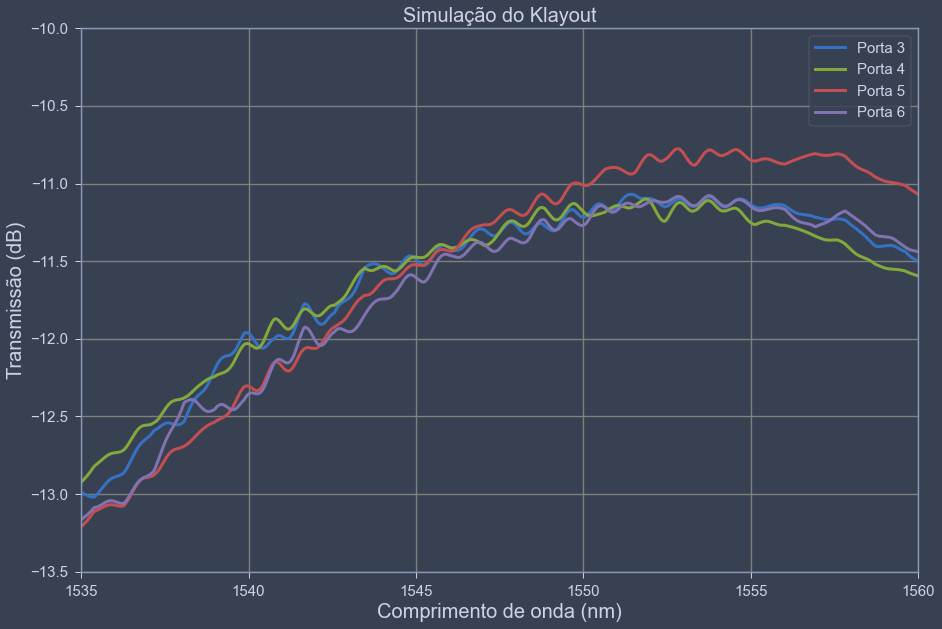

In [16]:
plt.figure(figsize=(15,10))
plt.plot(resultados1['wavelength']*1e9,resultados1['TE gain (dB)'],label='Porta 3',linewidth=3)
plt.plot(resultados2['wavelength']*1e9,resultados2['TE gain (dB)'],label='Porta 4',linewidth=3)
plt.plot(resultados3['wavelength']*1e9,resultados3['TE gain (dB)'],label='Porta 5',linewidth=3)
plt.plot(resultados4['wavelength']*1e9,resultados4['TE gain (dB)'],label='Porta 6',linewidth=3)

plt.legend(fontsize=15,loc='upper right')
plt.title('Simulação do Klayout',fontsize=20)
plt.ylim(-13.5,-10)
plt.xlim(1535,1560)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Comprimento de onda (nm)',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid(color='grey')
plt.savefig('espessura')